In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time

In [2]:
pd.options.display.max_colwidth=800
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 100)

In [3]:
df = pd.read_csv('datasets/SatisfactionClients/cdiscount.csv', index_col=0)
df.head(50)

,pays,note,titre,commentaire
0,FR,1,Les As du prélèvement illicite,"Il y a un jourLes As du prélèvement illicitePratiques à la limite de légal.J' ai pris un paiement en 4x dont il restait deux mois , pendant 1 semaine je ne retrouve pas ma carte , je la bloque temporairement.Le prelevement 3 ne passe pas Cdiscount m' informe qu' il faut régulariser, je retrouve ma carte et........boum deux prelevements simultanés des deux mensualités, celle du et l' autre prévue pour décembre.Cela me servira de leçon mais les vautours c 'est fini pour moi.Date de l'expérience: 14 novembre 2022"
1,FR,1,Commande une télévision avec rendez…,Il y a 13 heuresCommande une télévision avec rendez…Commande une télévision avec rendez vous du livreur. Je prend une journée de congé et le livreur ne vient pas. Je demande le renvoie de la télé chez Cdiscount. Cdiscount me rembourse la télé mes pas les 29 euros de livraison. Donc une journée de congé pour rien et un cadeau de 29 euros a Cdiscount. Plus jamais de commande sur Cdiscount.Date de l'expérience: 02 novembre 2022
2,FR,1,Entreprise qui pratique le f…,"Actualisé il y a 2 joursEntreprise qui pratique le f…Entreprise qui pratique le f…. de g……! Harcelé pour un problème entièrement de leur fait qui en réalité n’existe pas mais qu’ils sont totalement incapables de résoudre.Mais c’est le client qui est victime. Bravo le service après vente!!! Cdiscount zéro, Amazon 10/10 comparativement, certes un peu plus cher mais quel service. Morale: acceptez de payer un peu plus et soyez mieux considéré et surtout par des gens compétants.Date de l'expérience: 15 novembre 2022"
3,FR,1,des voleurrrrrrrrrs vous verrez plus ma…,Il y a 18 heuresdes voleurrrrrrrrrs vous verrez plus ma…des voleurrrrrrrrrs vous verrez plus ma carte bancaireproduits pourri et demande de rembourse moi alors la je bloque les paiement. n'acheté pas chez eux très trèsdéçu.ca a change c'était pas comme ca avant n'y va même pas .stop aux arnaquesDate de l'expérience: 05 octobre 2022
4,FR,5,Articles toujours conforment,"Il y a 18 heuresSur invitationArticles toujours conformentArticles toujours conforment, si échange ou annulation, jamais aucune difficulté, personnel compétent, livraisons toujours bien assurées, je suis entièrement satisfaite depuis de nombreuses années, le paiement en 4 fois est très pratiqueDate de l'expérience: 16 novembre 2022"
5,FR,1,Acheter une télé à 1400 € il y a 2 mois…,Actualisé il y a 7 heuresAcheter une télé à 1400 € il y a 2 mois…Acheter une télé à 1400 € il y a 2 mois arrivé à mon domicile complètement éclaté obligé de refaire le carton ce n'est pas une petite télé 2 m 08 anniversaire raté obligé de vous joindre par téléphone 15 € de hors forfait. 2 semaines après je reçois mon autre télé carton pas super état je rappelle le service client et encore 15 € de hors forfait pour parler 10 minutes je demande un dédommagement on me dit que d'ici 2 jours je recevrai un mail et rien du tout je m'aperçois que j'ai parlé pour rien dire vraiment pas correct de votre part. Je trouve ça inadmissible de votre part je suis pas responsable de tout ça c'est pas à moi de payer des frais supplémentairesDate de l'expérience: 16 novembre 2022
6,FR,1,Site à fuir !,"Il y a 20 heuresSite à fuir !Site à fuir !J'ai commandé sur le site et j'ai reçu autre chose, et lorsque j'ai voulu laissé le commentaire, ils disent que ce n'est pas dans leur politique. Il ne sont pas sérieux, le vendeur ne veut pas me rembourser.Date de l'expérience: 14 novembre 2022"
7,FR,2,OH MON AVIS POUR CDISCOUNT C EST TRES…,Il y a 13 heuresSur invitationOH MON AVIS POUR CDISCOUNT C EST TRES…OH MON AVIS POUR CDISCOUNT C EST TRES SIMPLE. A MES DIVERSES INTERVENTIONS POUR COMMANDER UN ARTICLE ET QUE JE VEUX UTILISER LE FAMEUX 3X4 SANS FRAIS CEST IMPOSSIBLE!!! JE CROIS QUE JE VAIS LES RAYER DE MES SITES. DESOLEEDate de l'expérience: 16 novembre 2022
8,FR,1,Fuyez Cdiscount,"Il y a 20 heuresFuyez CdiscountFuyez Cdiscount Client depuis 10 ans,Je suis épuisé de courir après mes 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120000 entries, 0 to 119999
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   pays         120000 non-null  object
 1   note         120000 non-null  int64 
 2   titre        119999 non-null  object
 3   commentaire  120000 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.6+ MB


### Chargement des stopswords

In [4]:
# chargement de la bibliothèque de stopwords et de tokenisation
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize.regexp import RegexpTokenizer
from nltk.tokenize import PunktSentenceTokenizer

In [5]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\t.fourtouill\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
# chargement des listes stopwords pour les 3 langues principales 
stop_words_french = stopwords.words('french')
stop_words_english = stopwords.words('english')
stop_words_spanish = stopwords.words('spanish')

In [7]:
# création d'une stopwords regroupant les 3 langues
stop_words = stop_words_french + stop_words_english + stop_words_spanish

### Wordcloud

In [8]:
from PIL import Image
from wordcloud import WordCloud

In [11]:
text_commentaire = ''
for comment in df['commentaire']:
    text_commentaire += str(comment)
    
text_titre = ''
for comment in df['titre']:
    text_titre += str(comment)

In [12]:
def plot_word_cloud(text, masque, background_color= "black", max_words=100, stopwords=stop_words):
    # Définir un masque
    mask_coloring =  np.array(Image.open(str(masque)))
    # Définir le calque du nuage des mots
    wc= WordCloud(background_color=background_color, max_words=max_words, 
                 stopwords=stop_words, mask= mask_coloring, 
                 max_font_size=50, random_state=42)
    # Générer et afficher le nuage de mots
    plt.figure(figsize= (20,10))
    wc.generate(text)
    plt.imshow(wc)
    plt.show()

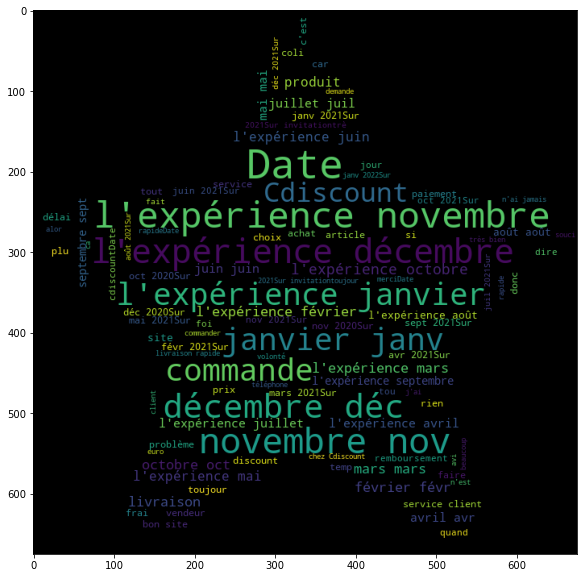

In [13]:
plot_word_cloud(text_commentaire, "images/star6.jpg")

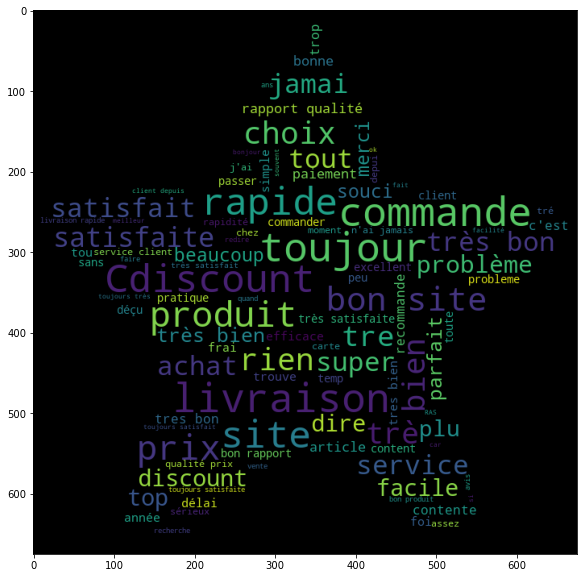

In [14]:
plot_word_cloud(text_titre, masque="images/star6.jpg")

### Wordcloud avec séparation des commentaires positifs (note 4 et 5) et négatifs (1 et 2)

In [27]:
text_titre_negatif = ''
for comment in df[(df['note']==1) | (df['note']==2)]['titre']:
    text_titre_negatif += str(comment)
    
text_titre_positif = ''
for comment in df[(df['note']==4) | (df['note']==5)]['titre']:
    text_titre_positif += str(comment)

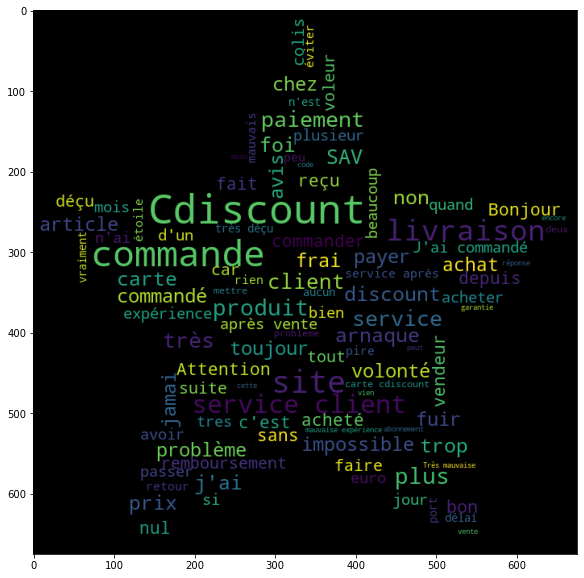

In [28]:
plot_word_cloud(text_titre_negatif, "images/star6.jpg")

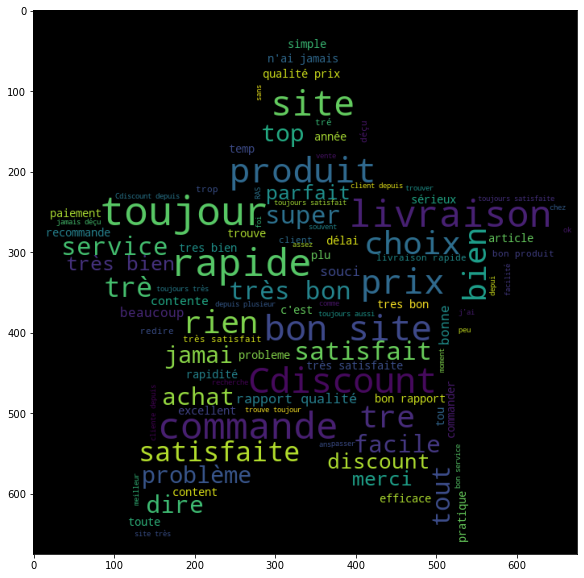

In [29]:
plot_word_cloud(text_titre_positif, "images/star6.jpg")

### retraitement des commentaires et titres 

In [30]:
def commentaire_filtering(txt, stop_words):
    new_txt = []
    tokenizer = RegexpTokenizer("[a-zA-Zéèëãñ]{3,}")
    tokens = tokenizer.tokenize(txt.lower())
    for word in tokens:
        if word not in stop_words:
            new_txt.append(word)
    return new_txt

In [35]:
# création d'une colonne commentaire_filtre par application de la fonction commentaire_filtering à la colonne commentaire
t0 = time()
df['Commentaire_filtre'] = df['commentaire'].apply(lambda x : commentaire_filtering(str(x), stop_words))
print('le temps de calcul est de {:.2f}'.format(time()-t0))

le temps de calcul est de 14.17


In [36]:
# création d'une colonne titre_commentaire_filtre par application de la fonction commentaire_filtering à la colonne titre_commentaire
t0 = time()
df['titre_filtre'] = df['titre'].apply(lambda x : commentaire_filtering(str(x), stop_words))
print('le temps de calcul est de {:.2f}'.format(time()-t0))

le temps de calcul est de 3.14


In [37]:
df.sample(3)

,pays,note,titre,commentaire,Commentaire_filtre,titre_filtre
42135,FR,4,bien,"19 févr. 2021Sur invitationbienbien, respect du delai de livraison,contente de mes achatsDate de l'expérience: 19 février 2021","[févr, invitationbienbien, respect, delai, livraison, contente, achatsdate, expérience, février]",[bien]
29628,FR,5,top comme d habitude,1 juil. 2021Sur invitationtop comme d habituderien a dire toujours aussi pratique et livrer très viteDate de l'expérience: 01 juillet 2021,"[juil, invitationtop, comme, habituderien, dire, toujours, aussi, pratique, livrer, très, vitedate, expérience, juillet]","[top, comme, habitude]"
58462,FR,4,BON COMPROMIS,30 oct. 2020Sur invitationBON COMPROMISRAS a voir a la livraisonDate de l'expérience: 30 octobre 2020,"[oct, invitationbon, compromisras, voir, livraisondate, expérience, octobre]","[bon, compromis]"


### Wordcloud appliqué aux colonnes retraitées

In [38]:
text_titre_retraite_negatif = ''
for comment in df[(df['note']==1) | (df['note']==2)]['titre_filtre']:
    text_titre_retraite_negatif += str(comment)
    
text_titre_retraite_positif = ''
for comment in df[(df['note']==4) | (df['note']==5)]['titre_filtre']:
    text_titre_retraite_positif += str(comment)

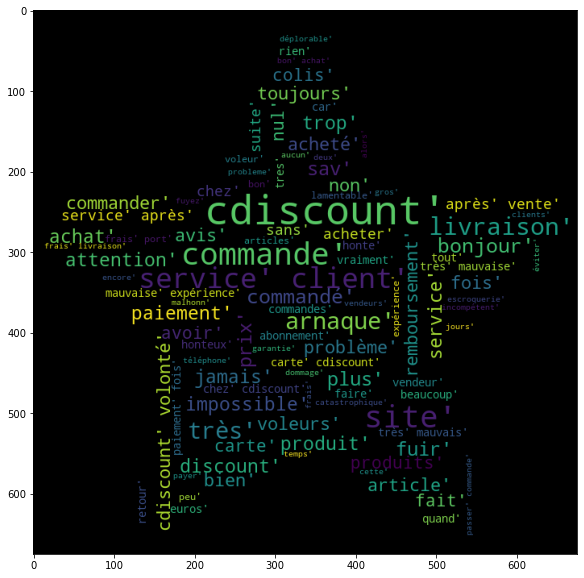

In [39]:
plot_word_cloud(text_titre_retraite_negatif, "images/star6.jpg")

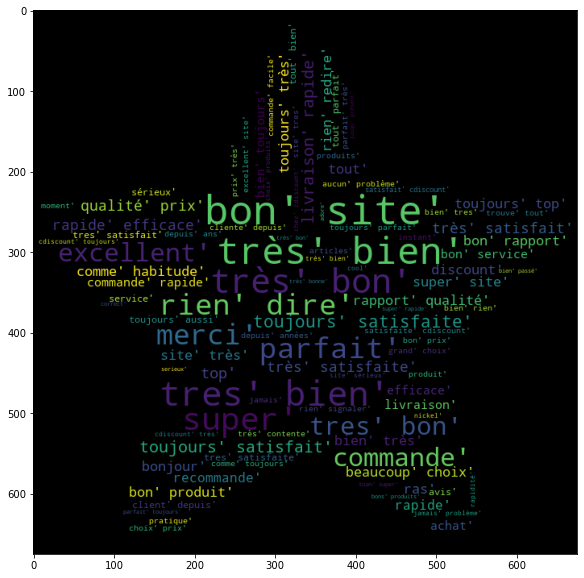

In [40]:
plot_word_cloud(text_titre_retraite_positif, "images/star6.jpg")

### Enregistrement du dataset

In [41]:
df.to_csv('datasets/SatisfactionClients/cdiscount_retraite.csv')